<a href="https://colab.research.google.com/github/IevaRadaviciute/obsidian-translations/blob/master/Python_Lab_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Programavimo įvado pratybos

- Python komandoms prisiminti: ``https://www.w3schools.com/python/``
- Naudingos Powershell komandos:

    - `ls` - pažiūrėti katalogo turinį

    - `md` - sukurti naują katalogą

    - `cd` - pereiti į katalogą / iš katalogo

    - `ni p5.py` - sukuria naują bylą vardu `p5.py`

    - `python p5.py` - kompiliuoja Python programą

Šio darbo tikslas - išmokti naudotis pandas biblioteka ir pagilinti grafikų piešimo įgūdžius. Žinių pagilinimui, rekomenduojame atliktį šį DataCamp kursą:

[Data Manipulation with pandas](https://app.datacamp.com/learn/courses/data-manipulation-with-pandas)

## A1

Nuskaitykite `Planets.csv` failą ir atvaizduokite:
- Pirmas dešimt eilučių
- Lentelės formą (eilučių / stulpelių skaičių)
- Atspausdinkite stulpelių pavadinimus

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv("Planets.csv", sep=",")

print(data[:10])
print(data.shape)
print(data.columns)

   loc_rowid                  pl_name               hostname    hd_name  \
0          1                 11 Com b                 11 Com  HD 107383   
1          4                 11 UMi b                 11 UMi  HD 136726   
2          7                 14 And b                 14 And  HD 221345   
3         10                 14 Her b                 14 Her  HD 145675   
4         18               16 Cyg B b               16 Cyg B  HD 186427   
5         24                 17 Sco b                 17 Sco        NaN   
6         25                 18 Del b                 18 Del  HD 199665   
7         28  1RXS J160929.1-210524 b  1RXS J160929.1-210524        NaN   
8         32                 24 Boo b                 24 Boo  HD 127243   
9         34                 24 Sex b                 24 Sex   HD 90043   

     hip_name  default_flag  sy_snum  sy_pnum  discoverymethod  disc_year  \
0   HIP 60202             1        2        1  Radial Velocity       2007   
1   HIP 74793       

## A2

Išfiltruokite lentelę ir atspausdinkite:
- Planetas atrastas tranzito "Transit" metodu.
- Planetas atrastas po 2015 metų.
- Planetas kurių periodas trumpesnis nei 10 dienų (Karštieji Jupiteriai).


In [8]:
transit = data[data["discoverymethod"] == "Transit"]
after_2015 = data[data['disc_year'] > 2015]
hot_jupiters = data[data['pl_orbper'] < 10]

## A3

Apskaičiuokite ir atspausdinkite stulpelio `pl_rade` (planetų spindulio):
- Vidurkį, medianą ir standartinį nuokrypį
- Minimalią ir maksimalią vertes
- Kiek planetų neturi duomenų

Užuomina: Panaudokite `.isna()` arba `.isnull()` trūkstamų verčių skaičiavimui



In [9]:
print(f"Mean: {data['pl_rade'].mean()}")
print(f"Median: {data['pl_rade'].median()}")
print(f"Std: {data['pl_rade'].std()}")
print(f"Min: {data['pl_rade'].min()}")
print(f"Max: {data['pl_rade'].max()}")

missing = data['pl_rade'].isna().sum()  # .isna() yra tapatus .isnull()
print(f"Trūksta spindulio duomenų: {missing}")

Mean: 6.44036316498366
Median: 2.416
Std: 87.95055674000662
Min: 0.27
Max: 4282.98
Trūksta spindulio duomenų: 2381


##A4

Panaikinkite visas eilutes kuriose nėra `pl_rade` duomenų.

Iš naujo nustatytykite indeksų vertes (`index=True`)

In [11]:
data = data.dropna(subset = ['pl_rade'], ignore_index = True)
# Alternatyva: data.dropna(subset = ['pl_rade], ignore_index = True, inplace = True)  no need to reasign

## A5

Sukurkite naują stulpelį, kuriame aprašysite planetos kategoriją:

- "Sub-Earth" jei planetos spindulys (`pl_rade`) < 1.0
- "Earth-like" jei planetos spindulys tarp 1.0 ir 2.0
- "Super-Earth" jei planetos spindulys tarp 2.0 ir 6.0
- "Neptune-like" jei planetos spindulys tarp 6.0 ir 15.0
- "Jupiter-like" jei planetos spindulys >= 15.0

Užuomina: Pirma sukurkite naują stulpelį su tuščiomis vertėmis, ir tuomet priskirkite naujas pagal užduotas sąlygas.

In [27]:
data["kategorija"] = None

data.loc[data["pl_rade"] < 1.0, "kategorija"] = "Sub-Earth"
data.loc[(data["pl_rade"] >= 1.0) & (data["pl_rade"] < 2.0), "kategorija"] = "Earth-like"
data.loc[data["pl_rade"].between(2, 6, inclusive="left"), ['kategorija']] = "Super-Earth"         # Pasinaudojama funkcija "between" vietoje "&"
data.loc[(data["pl_rade"] >= 6.0) & (data["pl_rade"] < 15.0), "kategorija"] = "Neptune-like"
data.loc[data["pl_rade"] >= 15.0, "kategorija"] = "Jupiter-like"

print(data['kategorija'])


0       Neptune-like
1       Jupiter-like
2        Super-Earth
3        Super-Earth
4        Super-Earth
            ...     
3667    Jupiter-like
3668    Jupiter-like
3669    Neptune-like
3670    Neptune-like
3671     Super-Earth
Name: kategorija, Length: 3672, dtype: object


## A6

Atvaizduokite grafike visų tipų planetas skirtingomis spalvomis.

Panaudokite `for` ciklą.

Grafiko x ašyje atidėkite planetos orbitą (`pl_orbper`), grafiko y ašyje atidėkite planetos masę Žemės masėmis (`pl_masse`).

Pakeiskite koordinačių ašis į logaritminę skalę.

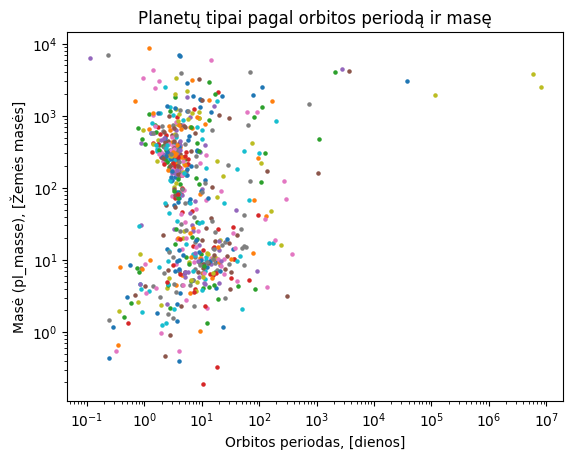

In [33]:
import matplotlib.pyplot as plt

plt.figure()

for category in data['pl_rade'].unique():
    subset = data[data['pl_rade'] == category]
    plt.scatter(subset['pl_orbper'], subset['pl_masse'], label=category, s = 5)

plt.xscale('log')                                                               # ašys pakeičiamos į logaritmines
plt.yscale('log')

plt.xlabel("Orbitos periodas, [dienos]")
plt.ylabel("Masė (pl_masse), [Žemės masės]")                                    # Žemės masę galima užrašyti kaip $M_\oplus, tačiau kažkodėl neveikia
plt.title("Planetų tipai pagal orbitos periodą ir masę")

plt.show()




## A7

Sugrupuokite duomenis pagal atradimo `discoverymethod` metodą ir suskaičiuokite:
- Kiek planetų atrasta kiekvienu metodu
- Kiekvienu metodu atrastų planetų vidutinį apsisukimo periodą
- Kiekvienu metodu atrastų planetų vidutinį spindulį


In [40]:
grupe = data.groupby("discoverymethod")

count = grupe['pl_name'].count()
print("Kiekis kiekvienam metodui:")
print(count)

mean_period = grupe['pl_orbper'].mean()
print("Vidutinis apsisukimo periodas kiekvienam metodui:")
print(mean_period)

mean_rade = grupe['pl_rade'].mean()
print("Vidutinis atrastų planetų spindulys kiekvienam metodui:")
print(mean_rade)



Kiekis kiekvienam metodui:
discoverymethod
Imaging                            21
Orbital Brightness Modulation       3
Radial Velocity                    22
Transit                          3615
Transit Timing Variations          11
Name: pl_name, dtype: int64
Vidutinis apsisukimo periodas kiekvienam metodui:
discoverymethod
Imaging                          2.799218e+06
Orbital Brightness Modulation    7.093081e-01
Radial Velocity                  2.721171e+01
Transit                          2.391342e+01
Transit Timing Variations        2.664247e+02
Name: pl_orbper, dtype: float64
Vidutinis atrastų planetų spindulys kiekvienam metodui:
discoverymethod
Imaging                          19.752867
Orbital Brightness Modulation     4.109059
Radial Velocity                   5.434935
Transit                           6.381615
Transit Timing Variations         2.978890
Name: pl_rade, dtype: float64


## A8


Atvaizduokite histogramą, kaip keitėsi atrastų planetų skaičius kiekvienais metais:

- histogramos stulpeliai - kas vienerius metus, nuo 2000 iki dabar
- stulpelių pločiai - 0.9
- spalva - `royalblue`

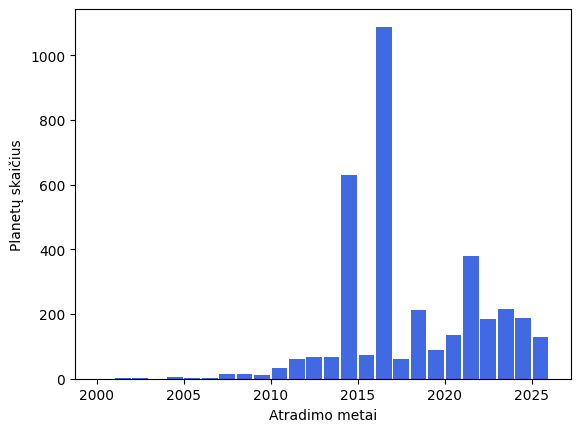

In [46]:
fig, ax =plt.subplots()

bins = np.arange(2000, data['disc_year'].max() +2, 1)        # 2024, +1 = 2025 - not included [2000; 2025), +2 = [2000, 2026)
ax.hist(data['disc_year'], bins = bins, rwidth = 0.9, color = "royalblue")

ax.set_xlabel("Atradimo metai")
ax.set_ylabel("Planetų skaičius")

plt.show()

## A9

Suskaičiuokite kiek planetų gali būti tinkamos gyvybei:

- Planetos spindulys (`pl_rade`) tarp 0,5 ir 2,0
- Planetos periodas (`pl_orbper`) tarp 200 ir 500
- Pusiausvyros (`pl_eqt`) temperatūra tarp 200 ir 350.

Įrašykite šių planetų duomenis į atskirą failą, kuriame būtų stulpeliai: planetos pavadinimas `pl_name`, žvaigždės pavadinimas `hostname`, skersmuo `pl_rade`, orbitinis periodas `pl_orbper`, temperatura `pl_eqt`, atstumas `sy_dist`.
Kiek tokių planetų radote?

In [53]:
radius_mask = (data["pl_rade"].between(0.5, 2))                       # sudaromi filtrai
orbit_mask = (data["pl_orbper"].between(200, 500))
temp_mask = (data["pl_eqt"].between(200, 350))

kandidatai = data.loc[radius_mask & orbit_mask & temp_mask]           # kandidatai atfiltruojami pagal pasirinktus filtrus

print(f"Yra {kandidatai.shape[0]} planetų")
print(kandidatai[["pl_name", "hostname", "pl_rade", "pl_orbper", "pl_eqt", "sy_dist"]])


Yra 2 planetų
           pl_name    hostname  pl_rade   pl_orbper  pl_eqt  sy_dist
2349  Kepler-452 b  Kepler-452     1.13  384.843022   220.0  551.727
2522   Kepler-62 f   Kepler-62     1.42  267.283301   205.0  300.874


## A10
įrašykite A9 užduotyje gautą atrastų planetų lentelę į naują failą, pavadinimu `habitable.csv`.

Stulpelius atskirkite kableliais, įrašykite stulpelių pavadinimus, nerašykite indeksų.

In [55]:
kandidatai[["pl_name", "hostname", "pl_rade", "pl_orbper", "pl_eqt", "sy_dist"]].to_csv("habitable.csv", sep =",", header = True, index = False)